# COVID India - Histogram comparison

In this notebook, we will compare the COVID cases in India between states as well as between districts within a state. Particularly, we will look at the following scenarios:

1. Number of active/ailing cases vs Number of recoveries
2. Number of active/ailing cases vs Number of deaths

The above two scenarios will be seen inter-state as well as inter-district.

The data used in this study is from <a href="https://api.covid19india.org/">here</a>.

### Load the JSON file that contains statewise records

In [1]:
import requests
import numpy as np

response = requests.get("https://api.covid19india.org/data.json")
data = response.json()
nat_active = int(data['statewise'][0]['active'])
nat_recovered = int(data['statewise'][0]['recovered'])
nat_death = int(data['statewise'][0]['deaths'])

states, active, recovered, deaths = [],[],[],[]
for state in data['statewise'][1:]:
    if(int(state['confirmed']) > 0):
        states.append(state['statecode'])
        active.append(int(state['active']))
        recovered.append(int(state['recovered']))   
        deaths.append(int(state['deaths']))

### Plot ailing vs recovered cases (state-wise) 

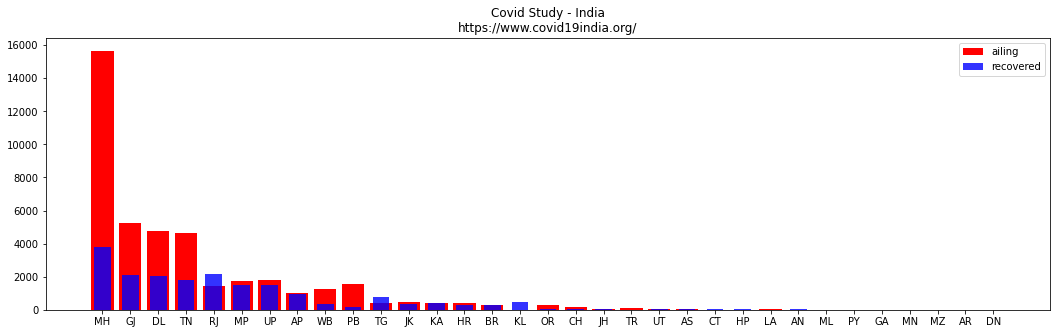

In [2]:
from matplotlib import pyplot as plt

# create plot
plt.subplots(figsize=(18,5))
indices = range(len(states))
bar_width = 0.8
opacity = 0.8

plt.bar(indices, active, width=bar_width, color='r', label='ailing')
plt.bar(indices, recovered, width=3*bar_width/4,alpha=opacity,color='b',label='recovered')
plt.xticks(indices, states)
plt.title('Covid Study - India'+'\n'+'https://www.covid19india.org/')
plt.legend()

plt.show()

### Plot ailing vs dead cases (state-wise) 

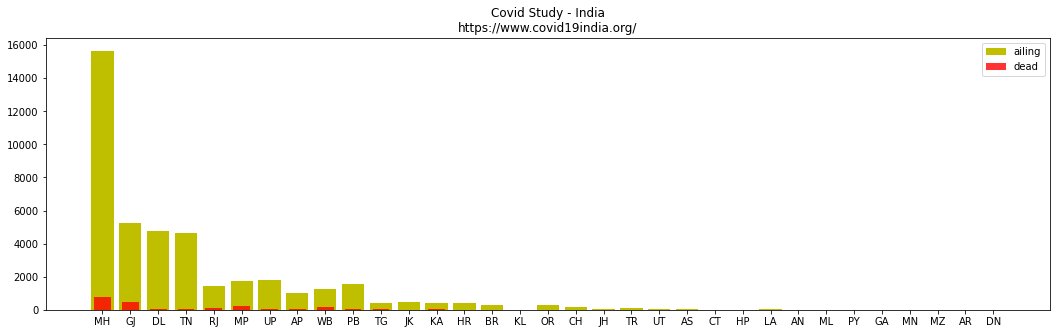

In [3]:
plt.subplots(figsize=(18,5))
plt.bar(indices, active, width=bar_width, color='y', label='ailing')
plt.bar(indices, deaths, width=3*bar_width/4,alpha=opacity,color='r',label='dead')
plt.xticks(indices, states)
plt.title('Covid Study - India'+'\n'+'https://www.covid19india.org/')
plt.legend()

plt.show()

### Plot the share of  each state's total number of cases. 
### Also further divide the share of each state into dead, ailing and recovered

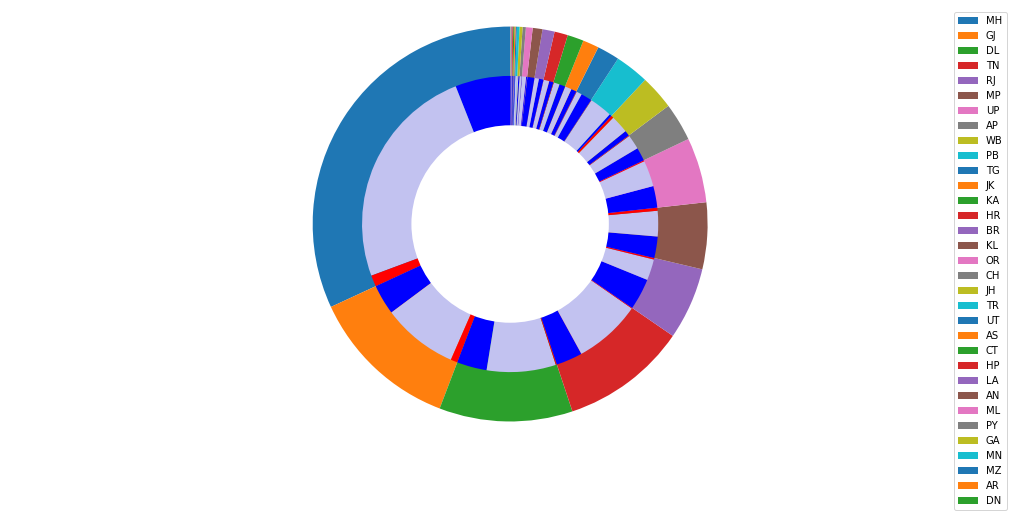

In [4]:
active = np.asarray(active)
recovered = np.asarray(recovered)
deaths = np.asarray(deaths)
total = active+recovered+deaths
stack = (np.dstack((recovered,active,deaths)).flatten())
colour_stack = ['b','#c2c2f0','r']*(len(stack)//3)

plt.subplots(figsize=(18,8))
plt.pie(total, startangle=90,frame=True)
plt.pie(stack, radius=0.75,colors=colour_stack,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(states) 
plt.axis('equal')
plt.show()

### Ailing vs Recovered graphs for selected states


State:  Telangana 

District                       Active Recovered Deaths
------------------------------------------------------------
Other State                         4      0      0
Adilabad                            6     15      0
Bhadradri Kothagudem                0      4      0
Hyderabad                         388    245     21
Jagtial                             2      2      0
Jangaon                             2      1      0
Jayashankar Bhupalapally            3      0      0
Jogulamba Gadwal                   19     25      1
Kamareddy                           4      8      0
Karimnagar                          4     15      0
Khammam                             5      3      0
Komaram Bheem                       7      0      0
Mahabubabad                         0      1      0
Mahabubnagar                        3      8      0
Mancherial                          0      0      1
Medak                               1      4      0
Medchal Malkajgiri             

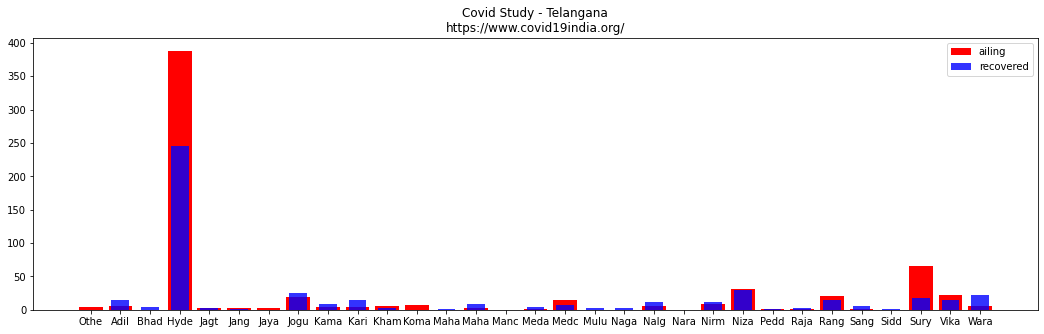


State:  Andhra Pradesh 

District                       Active Recovered Deaths
------------------------------------------------------------
Anantapur                          58     45      4
Chittoor                           38     74      0
East Godavari                      15     31      0
Guntur                            198    176      8
Krishna                           189    137     13
Kurnool                           311    239     16
Other State                        27      0      0
Prakasam                            3     60      0
S.P.S. Nellore                     36     62      3
Srikakulam                          5      0      0
Visakhapatnam                      37     25      1
Vizianagaram                        4      0      0
West Godavari                      35     33      0
Y.S.R. Kadapa                      54     43      0


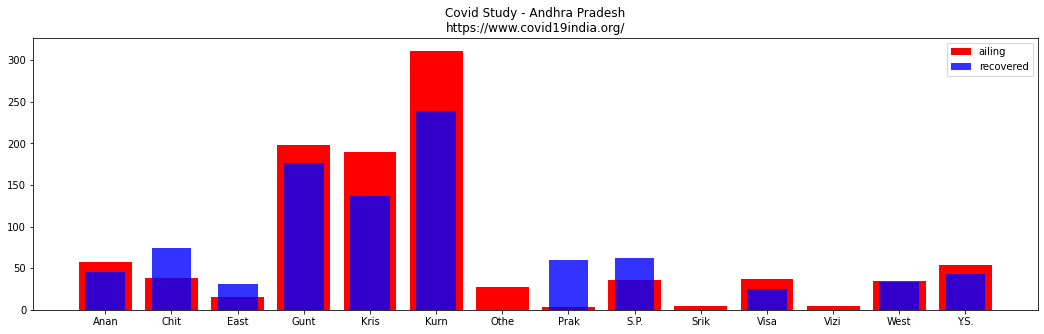


State:  Karnataka 

District                       Active Recovered Deaths
------------------------------------------------------------
Bagalkote                          40     18      1
Ballari                             4     11      0
Belagavi                           70     34      1
Bengaluru Rural                     0      6      0
Bengaluru Urban                    84     86      7
Bidar                              11     13      1
Chikkaballapura                     9     12      2
Chitradurga                         6      1      0
Dakshina Kannada                   15      7      3
Davanagere                         62      2      4
Dharwad                             5      7      0
Gadag                               3      1      1
Haveri                              2      0      0
Kalaburagi                         33     31      6
Kodagu                              0      1      0
Mandya                             14     14      0
Mysuru                         

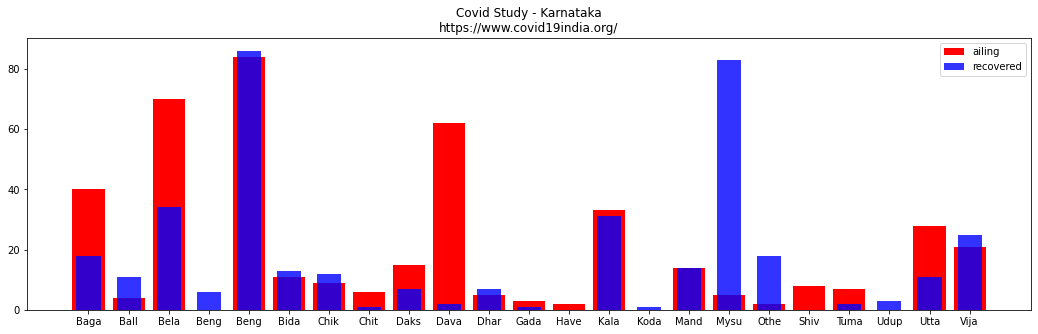


State:  Tamil Nadu 

District                       Active Recovered Deaths
------------------------------------------------------------
Ariyalur                          255      6      0
Chengalpattu                      165     51      2
Chennai                          2752    545     28
Coimbatore                          5    140      1
Cuddalore                         366     27      0
Dharmapuri                          3      1      0
Dindigul                           28     79      1
Erode                               0     69      1
Kallakurichi                       51      4      0
Kancheepuram                      100     12      1
Kanyakumari                         9     16      0
Karur                               4     42      0
Krishnagiri                        10      0      0
Madurai                            42     70      2
Nagapattinam                        1     44      0
Namakkal                           22     55      0
Nilgiris                      

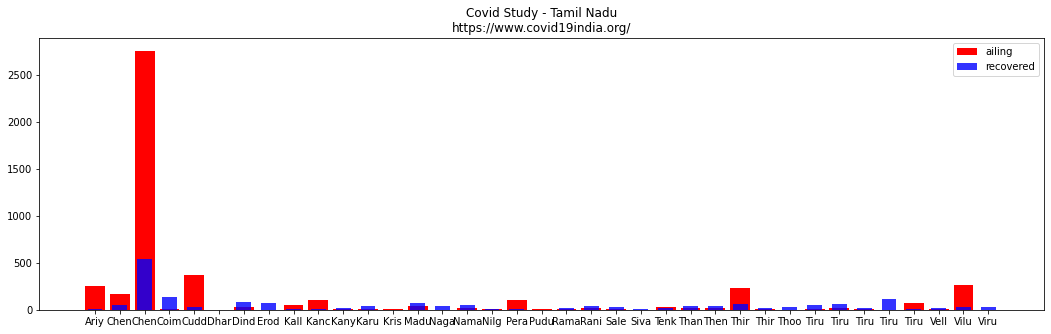

In [5]:
response = requests.get("https://api.covid19india.org/state_district_wise.json")
states = ['Telangana','Andhra Pradesh','Karnataka', 'Tamil Nadu']
data = response.json()
for state in states:
    info = data[state]['districtData']
    districts = list(info.keys())
    if 'Unknown' in districts:
        districts.remove('Unknown')
    active, deaths, recovered = [],[],[]
    for key in districts:
        active.append(info[key]['active'])
        recovered.append(info[key]['recovered'])
        deaths.append(info[key]['deceased'])
    print('\nState: ',state,'\n')
    print("{:30} {:6} {:6} {:6}".format('District','Active','Recovered','Deaths'))
    print('-'*60)
    for idx in range(len(districts)):
        print("{:30} {:6d} {:6d} {:6d}".format(districts[idx],active[idx],recovered[idx],deaths[idx]))

    indices = range(len(districts))
    plt.subplots(figsize=(18,5))
    plt.bar(indices, active, width=bar_width, color='r', label='ailing')
    plt.bar(indices, recovered, width=3*bar_width/4,alpha=opacity,color='b',label='recovered')
    plt.xticks(indices, [dis[:4] for dis in districts])
    plt.title('Covid Study - '+state+'\n'+'https://www.covid19india.org/')
    plt.legend()

    plt.show()